In [186]:
import pandas as pd
import sspa
import seaborn as sns
import matplotlib.pyplot as plt
import scipy


In [189]:
df = pd.read_csv('../Data/Su_COVID_metabolomics_processed_commoncases.csv', index_col=0)
reactome_pathways = sspa.process_gmt("../Data/Reactome_Homo_sapiens_pathways_compounds_R84.gmt")

In [187]:
df = pd.read_csv('../Data/Su_COVID_proteomics_processed_commoncases.csv', index_col=0)
reactome_pathways = sspa.process_reactome('Homo sapiens', infile = '../Data/UniProt2Reactome_all_Levels_ver84.txt', download_latest = False, filepath = None)

In [190]:
#Convert pathway ID to name
root_path = pd.read_excel('../Data/Root_pathways.xlsx', header=None)
root_pathway_dict = {root_path[0][i]:root_path[1][i] for i in range(0,len(root_path))}

root_pathway_names = list(root_pathway_dict.keys())
#Remove root pathways
reactome_pathways = reactome_pathways[~reactome_pathways.index.isin(root_pathway_names)]

In [191]:
for i in range(len(df.index)):
    if df.WHO_status[i] == '1-2':
        df['Group'][i] = 'Mild'
    else:
        df['Group'][i] = 'Severe'


C:\Users\jenna\AppData\Local\Temp\ipykernel_10792\897059123.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'][i] = 'Severe'
C:\Users\jenna\AppData\Local\Temp\ipykernel_10792\897059123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'][i] = 'Mild'


### Over-representation analysis

In [122]:
#Initiate an ORA object 
ora = sspa.sspa_ora(df.iloc[:,:-2], df["Group"], reactome_pathways, 0.05, custom_background=None)
#Carry out ORA
ora_res = ora.over_representation_analysis()
print(len(ora.DA_molecules))
display(ora.DA_test_res.sort_values(by="P-value"))
display(ora_res.sort_values(by="P-value"))


top_10_pathways = ora_res.sort_values(by="P-value").iloc[0:10, :]

194


,Entity,P-value,P-adjust
123,40992,4.453738e-22,1.483095e-19
89,4208,3.452817e-21,5.748940e-19
264,45441,8.362787e-17,9.282693e-15
252,52330,1.772157e-16,1.475321e-14
143,37084,1.256333e-15,8.367180e-14
...,...,...,...
78,16704,9.624143e-01,9.712637e-01
97,17562,9.625136e-01,9.712637e-01
224,73845,9.725518e-01,9.784283e-01
86,16335,9.760699e-01,9.790099e-01


,ID,Pathway_name,Hits,Coverage,P-value,P-adjust
65,R-HSA-428157,Sphingolipid metabolism,4/4,4/71,0.113702,0.997896
84,R-HSA-597592,Post-translational protein modification,4/4,4/187,0.113702,0.997896
92,R-HSA-71291,Metabolism of amino acids and derivatives,12/16,16/301,0.127752,0.997896
27,R-HSA-196854,Metabolism of vitamins and cofactors,6/7,7/205,0.134338,0.997896
89,R-HSA-6814848,Glycerophospholipid catabolism,3/3,3/12,0.196449,0.997896
...,...,...,...,...,...,...
63,R-HSA-425397,"Transport of vitamins, nucleosides, and relate...",6/16,16/66,0.975858,0.997896
81,R-HSA-5619115,Disorders of transmembrane transporters,6/17,17/102,0.986544,0.997896
29,R-HSA-211859,Biological oxidations,5/16,16/335,0.993782,0.997896
14,R-HSA-156584,Cytosolic sulfonation of small molecules,1/6,6/48,0.995039,0.997896


In [123]:
#Change name to have a line break otherwise it won't fit on the plot
top_10_pathways.Pathway_name[62] = '\n Transport of inorganic cations/anions and \n amino acids/oligopeptides   '

['4', '71']
['4', '187']
['16', '301']
['7', '205']
['3', '12']
['3', '96']
['3', '39']
['3', '29']
['3', '141']
['6', '61']
['  5.6%', '  2.1%', '  5.3%', '  3.4%', '  25.0%', '  3.1%', '  7.7%', '  10.3%', '  2.1%', '  9.8%']


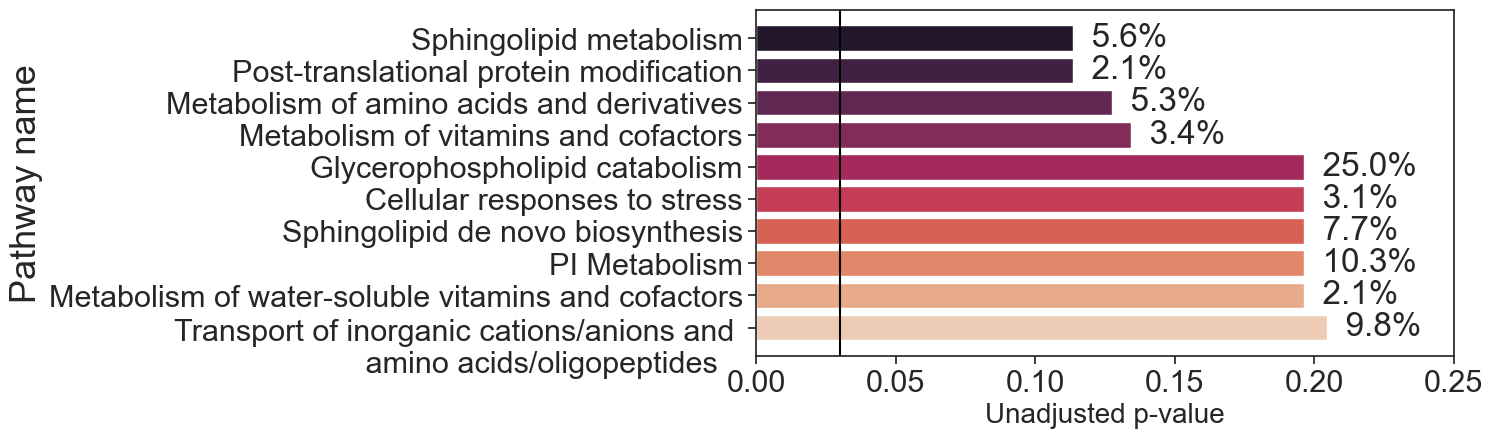

In [125]:

plt.figure(figsize=(9, 4.5))

sns.set(font_scale = 2)
sns.set_style("ticks") # same as "white" but with ticks

#If you want to colour by significance
#bar_color = ['tab:green' if float(i) < 0.05 else 'tab:grey' for i in top_20_pathways['P-value']]
#sns.barplot(data=top_10_pathways, y="Pathway_name", x="P-value", orient="h", palette=bar_color) #rocket, magma

#If you want to colour by gradient
ax = sns.barplot(data=top_10_pathways, y="Pathway_name", x="P-value", orient="h", palette="rocket",dodge=False, width=0.8) #rocket, magma

#Increase space between the bars and the axis
ax.relim()
ax.autoscale_view()


#Add pathway coverage
label = []
for i in top_10_pathways.Coverage:
    num = i.split('/')
    print(num)
    percent = (int(num[0]) / int(num[1])) *100
    label.append("  "+ str(round(percent,1))+ '%')

print(label)

ax.bar_label(ax.containers[0], labels=label)

#plt.title('Metabolomics',fontsize=22,pad=10)
plt.xlabel('Unadjusted p-value',fontsize=26)
plt.ylabel('Pathway name',fontsize=26) 
plt.xlim(0, 0.25)


plt.axvline(0.03, c="black")



#plt.savefig( '../Figures/metabolomic_ORA_top_10.png' , dpi=300,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [ ]:
list(top_10_pathways.Coverage)

For integrated data, take the two ORA results and combine the p-values with Fisher's method, which is what is commonly done (See Maghsoudi et al., 2021 for examples):

In [ ]:
metabolomic_ora = ora_res.sort_values(by="P-value")

In [ ]:
proteomic_ora = ora_res.sort_values(by="P-value")

In [ ]:
metabolomic_ora.index = metabolomic_ora["ID"]
metabolomic_ora.drop(columns = ["ID"]) #using Sara's code to drop root pathways

In [ ]:
proteomic_ora.index = proteomic_ora["ID"]
proteomic_ora.drop(columns = ["ID"]) #using Sara's code to drop root pathways

In [ ]:
result = metabolomic_ora.merge(proteomic_ora, how='inner',right_index=True, left_index = True)
result[:5]

In [ ]:
result["combined_pval"] = 0

In [ ]:
for i in range(len(result.index)):
    ID_list = [result["P-value_x"][i],result["P-value_y"][i]]
    print(ID_list)
    test_stat,pval = scipy.stats.combine_pvalues(ID_list, method='fisher',weights=None)
    print(pval)
    result["combined_pval"][i] = pval


In [ ]:
result[:10]

In [ ]:
result.Coverage_x[0]

In [ ]:
top_10_pathways = result.sort_values(by="combined_pval").iloc[0:10, :]

In [ ]:
#Obtain pathway coverage for the top 10 results
df = pd.read_csv("../Data/Su_integrated_data.csv", index_col=0)
reactome_pathways = pd.read_csv("../Data/Reactome_multi_omics_ChEBI_Uniprot.csv", index_col=0,dtype="str") #Dtype warning because in some columns, some values are in string format whereas some are in integer format, that's why I specify dtype="str"
kpca_scores = sspa.sspa_kpca(df.iloc[:,:-2], reactome_pathways)


#Convert pathway ID to name
root_path = pd.read_excel('../Data/Root_pathways.xlsx', header=None)
root_pathway_dict = {root_path[0][i]:root_path[1][i] for i in range(0,len(root_path))}

root_pathway_names = list(root_pathway_dict.keys())
#Using Sara's code, remove root pathways
kpca_scores = kpca_scores.drop(columns = list(set(root_pathway_names) & set(kpca_scores.columns)))



#Filter out the molecules in the pathways that are not present in the dataset
#Obtain all unique values in dataset
compounds_present = list(df.columns[:-2])
filtered_dict = {} 

#Obtain pathways and corresponding molecules for all Reactome pathways, store as dictionary
orig_dict = sspa.utils.pathwaydf_to_dict(reactome_pathways)

#Filter out dictionary to retain only the pathways that remain after kPCA
my_keys = kpca_scores.columns
pathways_dict = {key: orig_dict[key] for key in my_keys}


#My code adapted from Cecilia's
#If the key values are not part of the compounds in dataset then remove
for key,value in pathways_dict.items():
    new_val = [item for item in value if item in compounds_present]
    if len(new_val) >= 2: #at least two compounds in the pathway
        filtered_dict[key] = new_val

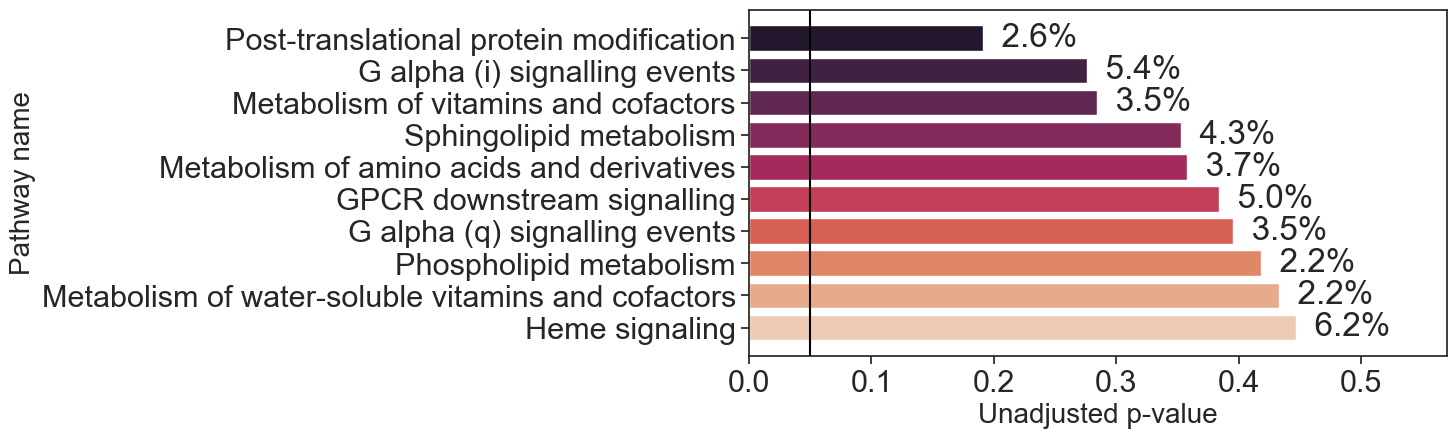

In [74]:

plt.figure(figsize=(9, 4.5))
sns.set(font_scale = 2)

sns.set_style("ticks") # same as "white" but with ticks

ax = sns.barplot(data=top_10_pathways, y="Pathway_name_x", x="combined_pval", orient="h", palette="rocket") #rocket, magma


#Increase space between the bars and the axis
ax.relim()
ax.autoscale_view()



label = []
# percent1 = []
# percent2 = []

#Getting pathway coverage by taking the average of the metabolomic and proteomic pathway coverage (not ideal)
# for i in range(10):
#     pathway1 =  top_10_pathways.Coverage_x[i]
#     num = pathway1.split('/')
#     percent1 = (int(num[0]) / int(num[1])) *100
#     print(percent1)

#     pathway2 =  top_10_pathways.Coverage_y[i]
#     num = pathway2.split('/')
#     percent2 = (int(num[0]) / int(num[1])) *100
#     print(percent2)

#     percent = (percent1+percent2)/2
#     print(percent)
#     label.append("  "+ str(round(percent,1))+ '%')

# print(label)


#Getting pathway coverage by using the Reactome pathway definitions concatenated together
for i in range(10):
    pathway_nam = top_10_pathways.iloc[i,0]
    
    num_in_df = len(filtered_dict[pathway_nam])
    num_whole_pathway = len(pathways_dict[pathway_nam])

    percent = (num_in_df/num_whole_pathway) * 100

    label.append("  "+ str(round(percent,1))+ '%')

ax.bar_label(ax.containers[0], labels=label)

#plt.title('ORA for integrated data',fontsize=22,pad=10)
plt.xlabel('Unadjusted p-value',fontsize=26)
plt.ylabel('Pathway name',fontsize=26) 
plt.xlim(0, 0.57);

plt.axvline(0.05, c="black")

#plt.savefig( '../Figures/integrated_ORA_top_10.png' , dpi=300,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

### Gene-set Enrichment Analysis

In [192]:
gsea_res = sspa.sspa_gsea(df.iloc[:,:-2], df["Group"], reactome_pathways)

In [193]:
display(gsea_res.sort_values(by="P-adjust FDR")) #0.54 is the lowest for metabolomic, 0.056 for proteomic
#display(gsea_res.sort_values(by="P-value"))

,Pathway_ID,Pathway_name,ES,NES,P-value,P-adjust FDR,P-adjust FWER,Tag %,Entity %,Leading_edge
5,R-HSA-425407,SLC-mediated transmembrane transport,0.452285,1.474488,0.051383,0.537223,0.585,15/33,31.23%,4208;16680;16199;16283;15344;16040;15756;17568...
8,R-HSA-5663205,Infectious disease,0.911178,1.442434,0.043738,0.555563,0.696,1/2,8.71%,16680
10,R-HSA-73614,Pyrimidine salvage,0.757897,1.418139,0.067485,0.566262,0.761,2/4,23.72%,17802;17568
6,R-HSA-1614635,Sulfur amino acid metabolism,0.703485,1.451648,0.071571,0.580345,0.666,4/6,26.43%,30831;17509;17482;17750
3,R-HSA-2408508,"Metabolism of ingested SeMet, Sec, MeSec into ...",0.96654,1.48528,0.006237,0.580781,0.55,1/2,3.30%,30831
...,...,...,...,...,...,...,...,...,...,...
32,R-HSA-2262752,Cellular responses to stress,0.736364,1.16961,0.298419,1.0,0.999,3/3,27.03%,15756;17351;16827
115,R-HSA-5619063,Defective SLC29A3 causes histiocytosis-lymphad...,-0.396341,-0.758293,0.737288,1.0,1.0,5/5,61.26%,16708;16704;16335;17562;17596
31,R-HSA-83936,Transport of nucleosides and free purine and p...,0.539713,1.189375,0.266145,1.0,0.997,4/8,39.34%,16040;17568;17368;17596
39,R-HSA-1483257,Phospholipid metabolism,-0.563098,-1.101136,0.371032,1.0,1.0,2/5,3.90%,18132;17553


In [194]:
#Change name to have a line break otherwise it won't fit on the plot
gsea_res.Pathway_name[0] = 'Regulation of Insulin-like Growth Factor (IGF) transport and \n uptake by Insulin-like Growth Factor Binding Proteins (IGFBPs)'

In [195]:
top_10_pathways_gsea

,Pathway_name_x,ES_x,NES_x,P-value_x,P-adjust FDR_x,P-adjust FWER_x,Tag %_x,Entity %_x,Leading_edge_x,Pathway_name_y,ES_y,NES_y,P-value_y,P-adjust FDR_y,P-adjust FWER_y,Tag %_y,Entity %_y,Leading_edge_y,combined_pval
Pathway_ID,,,,,,,,,,,,,,,,,,,
R-HSA-2408522,Selenoamino acid metabolism,0.96654,1.48528,0.006237,0.580781,0.55,1/2,3.30%,30831,Selenoamino acid metabolism,0.794248,1.182138,0.266932,0.773021,1.0,2/2,20.93%,P23526;P50135,0.012317
R-HSA-2408508,"Metabolism of ingested SeMet, Sec, MeSec into ...",0.96654,1.48528,0.006237,0.580781,0.55,1/2,3.30%,30831,"Metabolism of ingested SeMet, Sec, MeSec into ...",0.794248,1.182138,0.266932,0.773021,1.0,2/2,20.93%,P23526;P50135,0.012317
R-HSA-2187338,Visual phototransduction,0.758308,1.087944,0.37551,0.884991,1.0,2/2,24.62%,15756;17351,Visual phototransduction,-0.767656,-1.490669,0.022044,1.0,0.911,3/5,18.06%,P31431;Q04759;P06858,0.047963
R-HSA-71387,Metabolism of carbohydrates,0.775678,1.52676,0.03,0.589442,0.409,1/4,0.30%,4208,Metabolism of carbohydrates,0.38097,0.981285,0.497076,0.86524,1.0,6/10,33.92%,P13611;Q11201;P09467;P07585;P00352;P51888,0.077627
R-HSA-975634,Retinoid metabolism and transport,0.758308,1.087944,0.37551,0.884991,1.0,2/2,24.62%,15756;17351,Retinoid metabolism and transport,-0.806771,-1.384562,0.045726,1.0,0.99,2/3,18.06%,P31431;P06858,0.086961
R-HSA-5663205,Infectious disease,0.911178,1.442434,0.043738,0.555563,0.696,1/2,8.71%,16680,Infectious disease,0.321197,1.055988,0.398773,0.85236,1.0,15/36,29.07%,P07711;P05231;P09601;P22301;Q11201;Q96D42;Q141...,0.088060
R-HSA-597592,Post-translational protein modification,0.801903,1.42451,0.043651,0.585367,0.743,3/4,9.01%,4208;16680;17509,Post-translational protein modification,0.305563,0.982479,0.479371,0.868653,1.0,18/38,43.61%,P15514;P05231;Q07065;P19022;P13611;P09603;P011...,0.101838
R-HSA-6806667,Metabolism of fat-soluble vitamins,0.641425,0.995603,0.524313,0.918,1.0,2/3,24.62%,15756;17351,Metabolism of fat-soluble vitamins,-0.806771,-1.384562,0.045726,1.0,0.99,2/3,18.06%,P31431;P06858,0.113418
R-HSA-71291,Regulation of Insulin-like Growth Factor (IGF)...,0.579259,1.626558,0.025743,0.651087,0.2,10/16,26.43%,16946;30831;17509;16199;15999;17482;16530;1673...,Metabolism of amino acids and derivatives,0.179672,0.417433,0.994275,0.998964,1.0,5/9,43.61%,P23526;P50135;Q9UJM8;P05089;P25786,0.119411


['  0.30%', '  3.30%', '  3.30%', '  26.43%', '  0.30%', '  7.81%', '  9.01%', '  9.01%', '  9.01%', '  9.01%']


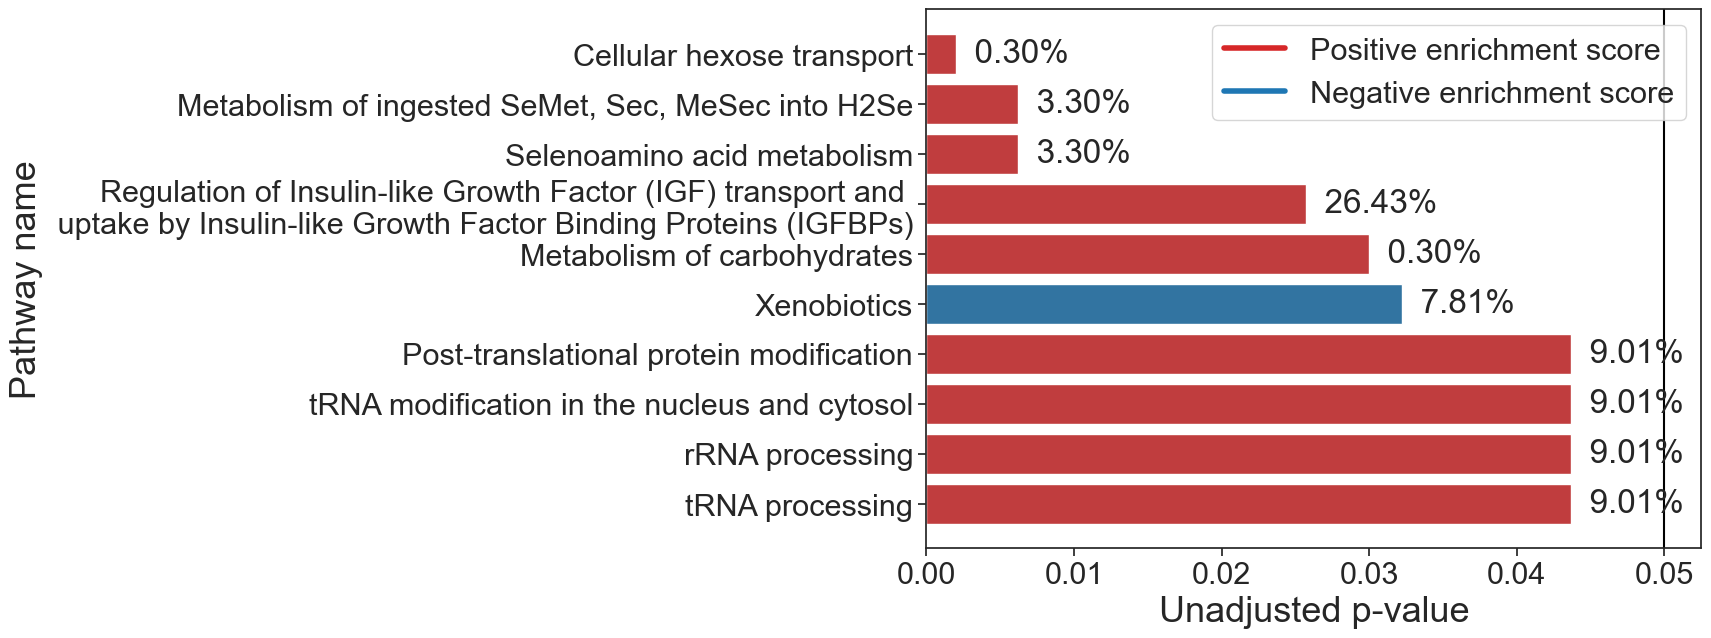

In [197]:
from matplotlib.lines import Line2D #To colour the bar by enrichment

top_10_pathways_gsea = gsea_res.sort_values(by="P-value").iloc[0:10, :]
plt.figure(figsize=(10, 7))

sns.set(font_scale = 2) #sns.set(font_scale = 1.2) for metabolomic because of long label
sns.set_style("ticks") # same as "white" but with ticks

# set bar colour based on normalised enrichment score sign
bar_color = ['tab:red' if float(i) > 0 else 'tab:blue' for i in top_10_pathways_gsea['NES']]
ax = sns.barplot(data=top_10_pathways_gsea, y="Pathway_name", x="P-value", orient="h", palette=bar_color)

#Increase space between the bars and the axis
ax.relim()
ax.autoscale_view()



label = []
for pathway in top_10_pathways_gsea["Entity %"]:
    label.append("  "+ pathway)

print(label)

ax.bar_label(ax.containers[0], labels=label)

#plt.title('GSEA for proteomic data',fontsize=22,pad=10)
plt.xlabel('Unadjusted p-value',fontsize=26)
plt.ylabel('Pathway name',fontsize=26) ;

plt.axvline(0.05, c="black")

# add legend
custom_lines = [Line2D([0], [0], color='tab:red', lw=4),
                Line2D([0], [0], color='tab:blue', lw=4)]
plt.legend(handles=custom_lines, labels=['Positive enrichment score', 'Negative enrichment score'],loc="upper right")

#plt.savefig( '../Figures/metabolomic_GSEA_top_10.png' , dpi=300,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

For integrated data, take the two GSEA results and combine the p-values with Fisher's method, which is what is commonly done (See Maghsoudi et al., 2021 for examples):

In [92]:
metabolomic_gsea = gsea_res.sort_values(by="P-value")
metabolomic_gsea = metabolomic_gsea.set_index(['Pathway_ID'])

In [141]:
proteomic_gsea = gsea_res.sort_values(by="P-value")
proteomic_gsea = proteomic_gsea.set_index(['Pathway_ID'])

In [ ]:
metabolomic_gsea

In [ ]:
proteomic_gsea

In [142]:
result = metabolomic_gsea.merge(proteomic_gsea, how='inner',right_index=True, left_index = True)
result[:5]

,Pathway_name_x,ES_x,NES_x,P-value_x,P-adjust FDR_x,P-adjust FWER_x,Tag %_x,Entity %_x,Leading_edge_x,Pathway_name_y,ES_y,NES_y,P-value_y,P-adjust FDR_y,P-adjust FWER_y,Tag %_y,Entity %_y,Leading_edge_y
Pathway_ID,,,,,,,,,,,,,,,,,,
R-HSA-2408522,Selenoamino acid metabolism,0.96654,1.48528,0.006237,0.580781,0.55,1/2,3.30%,30831,Selenoamino acid metabolism,0.794248,1.182138,0.266932,0.773021,1.0,2/2,20.93%,P23526;P50135
R-HSA-2408508,"Metabolism of ingested SeMet, Sec, MeSec into ...",0.96654,1.48528,0.006237,0.580781,0.55,1/2,3.30%,30831,"Metabolism of ingested SeMet, Sec, MeSec into ...",0.794248,1.182138,0.266932,0.773021,1.0,2/2,20.93%,P23526;P50135
R-HSA-71291,Regulation of Insulin-like Growth Factor (IGF)...,0.579259,1.626558,0.025743,0.651087,0.2,10/16,26.43%,16946;30831;17509;16199;15999;17482;16530;1673...,Metabolism of amino acids and derivatives,0.179672,0.417433,0.994275,0.998964,1.0,5/9,43.61%,P23526;P50135;Q9UJM8;P05089;P25786
R-HSA-71387,Metabolism of carbohydrates,0.775678,1.52676,0.03,0.589442,0.409,1/4,0.30%,4208,Metabolism of carbohydrates,0.38097,0.981285,0.497076,0.86524,1.0,6/10,33.92%,P13611;Q11201;P09467;P07585;P00352;P51888
R-HSA-597592,Post-translational protein modification,0.801903,1.42451,0.043651,0.585367,0.743,3/4,9.01%,4208;16680;17509,Post-translational protein modification,0.305563,0.982479,0.479371,0.868653,1.0,18/38,43.61%,P15514;P05231;Q07065;P19022;P13611;P09603;P011...


In [143]:
result["combined_pval"] = 0

In [144]:
for i in range(len(result.index)):
    ID_list = [result["P-value_x"][i],result["P-value_y"][i]]
    print(ID_list)
    test_stat,pval = scipy.stats.combine_pvalues(ID_list, method='fisher',weights=None)
    print(pval)
    result["combined_pval"][i] = pval


[0.006237006237006237, 0.26693227091633465]
0.012316646723185201
[0.006237006237006237, 0.26693227091633465]
0.012316646723185201
[0.02574257425742574, 0.9942748091603053]
0.1194105524469273
[0.03, 0.49707602339181284]
0.07762692399530659
[0.04365079365079365, 0.4793713163064833]
0.10183777495887114
[0.0437375745526839, 0.3987730061349693]
0.08805988884049253
[0.09073359073359073, 0.4841897233201581]
0.1812252839796926
[0.1976284584980237, 0.6900584795321637]
0.40808168528499134
[0.20758483033932135, 0.5356415478615071]
0.35542281180558577
[0.22549019607843138, 0.39549180327868855]
0.30473569253641736
[0.2459016393442623, 0.6906614785992218]
0.4709398375150151
[0.2633663366336634, 0.7212121212121212]
0.5054442495976447
[0.2984189723320158, 0.3844621513944223]
0.363142115260965
[0.300990099009901, 0.2796116504854369]
0.292459827666266
[0.3303964757709251, 0.2964509394572025]
0.32550856203717404
[0.3521739130434783, 0.30505050505050507]
0.347099136816296
[0.37103174603174605, 0.400398406

C:\Users\jenna\AppData\Local\Temp\ipykernel_10792\54959011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["combined_pval"][i] = pval


In [145]:
#Obtain pathway coverage for the top 10 results
df = pd.read_csv("../Data/Su_integrated_data.csv", index_col=0)
reactome_pathways = pd.read_csv("../Data/Reactome_multi_omics_ChEBI_Uniprot.csv", index_col=0,dtype="str") #Dtype warning because in some columns, some values are in string format whereas some are in integer format, that's why I specify dtype="str"
kpca_scores = sspa.sspa_kpca(df.iloc[:,:-2], reactome_pathways)


#Convert pathway ID to name
root_path = pd.read_excel('../Data/Root_pathways.xlsx', header=None)
root_pathway_dict = {root_path[0][i]:root_path[1][i] for i in range(0,len(root_path))}

root_pathway_names = list(root_pathway_dict.keys())
#Using Sara's code, remove root pathways
kpca_scores = kpca_scores.drop(columns = list(set(root_pathway_names) & set(kpca_scores.columns)))



#Filter out the molecules in the pathways that are not present in the dataset
#Obtain all unique values in dataset
compounds_present = list(df.columns[:-2])
filtered_dict = {} 

#Obtain pathways and corresponding molecules for all Reactome pathways, store as dictionary
orig_dict = sspa.utils.pathwaydf_to_dict(reactome_pathways)

#Filter out dictionary to retain only the pathways that remain after kPCA
my_keys = kpca_scores.columns
pathways_dict = {key: orig_dict[key] for key in my_keys}


#My code adapted from Cecilia's
#If the key values are not part of the compounds in dataset then remove
for key,value in pathways_dict.items():
    new_val = [item for item in value if item in compounds_present]
    if len(new_val) >= 2: #at least two compounds in the pathway
        filtered_dict[key] = new_val

['  2.2%', '  9.8%', '  4.1%', '  3.0%', '  6.2%', '  2.6%', '  2.6%', '  6.3%', '  3.7%', '  2.8%']


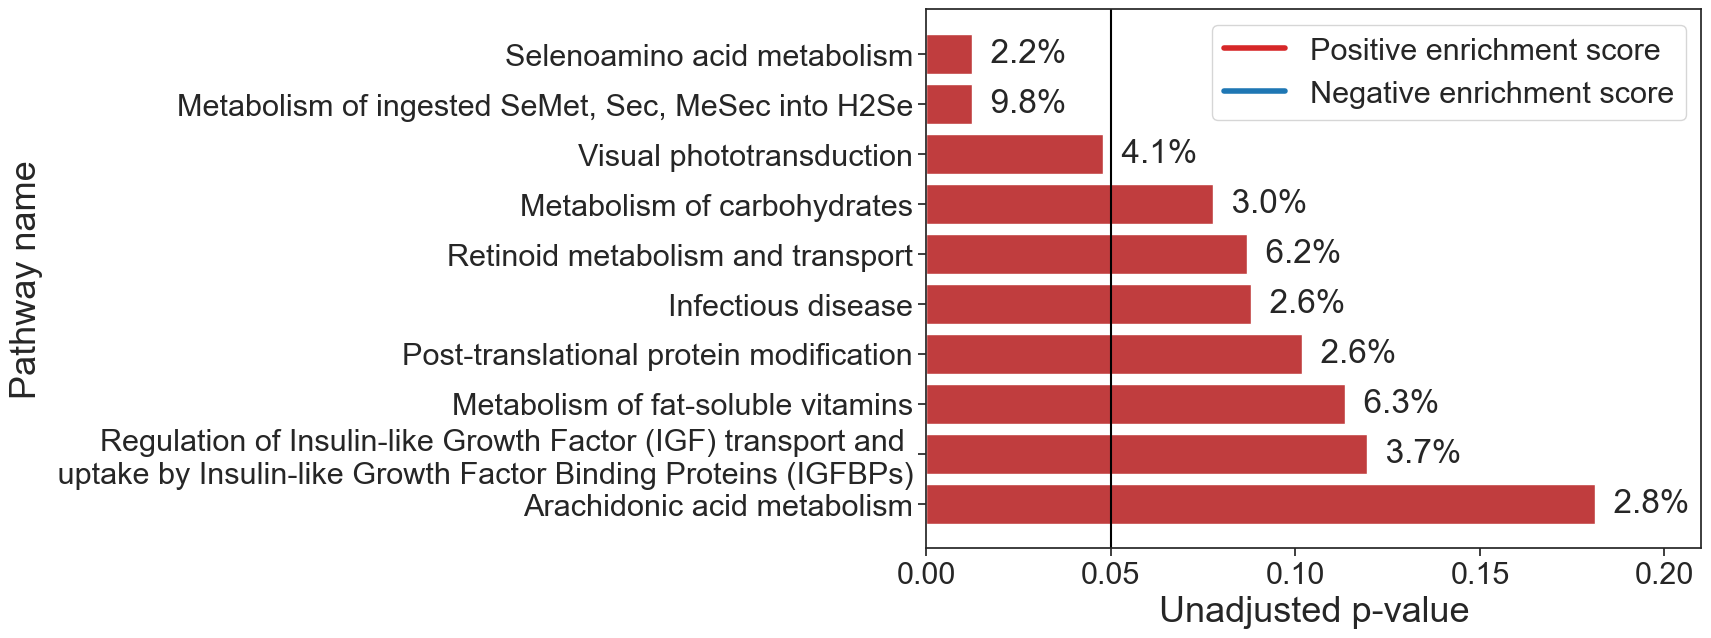

In [185]:
from matplotlib.lines import Line2D

top_10_pathways_gsea = result.sort_values(by="combined_pval").iloc[0:10, :]
plt.figure(figsize=(10, 7))

sns.set(font_scale = 2) #sns.set(font_scale = 1.2) for metabolomic because of long label
sns.set_style("ticks") # same as "white" but with ticks

# set bar colour based on normalised enrichment score sign
bar_color = ['tab:red' if float(i) > 0 else 'tab:blue' for i in top_10_pathways_gsea['NES_x']]
ax = sns.barplot(data=top_10_pathways_gsea, y="Pathway_name_x", x="combined_pval", orient="h", palette=bar_color)

#Increase space between the bars and the axis
ax.relim()
ax.autoscale_view()


label=[]
# for i in range(10):
#     pathway1 =  top_10_pathways_gsea["Entity %_x"][i][:-1]
    
#     pathway2 =  top_10_pathways_gsea["Entity %_y"][i][:-1]

#     percent = (float(pathway1)+float(pathway2))/2
#     print(percent)
#     label.append("  "+ str(round(percent,1))+ '%')

# print(label)

for i in range(10):

    pathway_nam = top_10_pathways_gsea.index[i]
    
    num_in_df = len(filtered_dict[pathway_nam])
    num_whole_pathway = len(pathways_dict[pathway_nam])

    percent = (num_in_df/num_whole_pathway) * 100

    label.append("  "+ str(round(percent,1))+ '%')


print(label)



ax.bar_label(ax.containers[0], labels=label)

#plt.title('GSEA for integrated data',fontsize=22, pad=10)
plt.xlabel('Unadjusted p-value',fontsize=26)
plt.ylabel('Pathway name',fontsize=26) 
plt.xlim(0, 0.21);

plt.axvline(0.05, c="black")

#Add legend
custom_lines = [Line2D([0], [0], color='tab:red', lw=4),
                Line2D([0], [0], color='tab:blue', lw=4)]
plt.legend(handles=custom_lines, labels=['Positive enrichment score', 'Negative enrichment score'],loc="upper right")


#plt.savefig( '../Figures/integrated_GSEA_top_10.png' , dpi=300,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')